In [0]:
from google.colab import drive      #mounting drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd   #importing pandas
import numpy as np    #importing numpy
identity = pd.read_csv('/content/drive/My Drive/Fraud detection/train_identity.csv')   #reading identity data

In [0]:
transaction = pd.read_csv('/content/drive/My Drive/Fraud detection/train_transaction.csv')  #reading the transaction data

In [0]:
train = transaction.merge(identity, how = 'left')  #merging transaction and identity data

In [0]:
   def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [0]:
null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]

In [0]:
train.drop(null_cols,axis=1,inplace=True)

In [0]:
for i in train.columns:
    if train[i].dtypes=='int64' or train[i].dtypes=='float64':   #filling null alues with mean for continuous variables
        train[i].fillna(train[i].mean(),inplace=True)

In [0]:
for i in train.columns:
    if train[i].dtypes=='object':     #filling null alues with mode for categorical variables
        train[i].fillna(train[i].mode()[0],inplace=True)

In [0]:
train.shape

(590540, 434)

In [0]:
train['transaction_day_of_the_week'] = np.floor((train['TransactionDT'] / (3600 * 24) - 1) % 7)

In [0]:
train['Transaction_hour'] = np.floor(train['TransactionDT'] / 3600) % 24

In [0]:
train['device_name'] = train['DeviceInfo'].str.split('/', expand=True)[0]  #categorical

In [0]:
train['device_version'] = train['DeviceInfo'].str.split('/', expand=True)[1]  #categorical

In [0]:
train['OS_id_30'] = train['id_30'].str.split(' ', expand=True)[0]   #categorical

In [0]:
train['version_id_30'] = train['id_30'].str.split(' ', expand=True)[1]   #categorical 

In [0]:
train['browser_id_31'] = train['id_31'].str.split(' ', expand=True)[0]   #categorical

In [0]:
train['version_id_31'] = train['id_31'].str.split(' ', expand=True)[1]   #categorical

In [0]:
train['id_34'] = train['id_34'].str.split(':', expand=True)[1]

In [0]:
train.loc[train['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'

In [0]:
train.loc[train['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'

In [0]:
train.loc[train['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'

In [0]:
train.loc[train['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'

In [0]:
train.loc[train['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'

In [0]:
train.loc[train['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'

In [0]:
train.loc[train['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'

In [0]:
train.loc[train['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'

In [0]:
train.loc[train['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'

In [0]:
train.loc[train['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'

In [0]:
train.loc[train['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'

In [0]:
train.loc[train['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'

In [0]:
train.loc[train['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'

In [0]:
train.loc[train['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'

In [0]:
train.loc[train['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'

In [0]:
train.loc[train['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'

In [0]:
train.loc[train['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

In [0]:
train.loc[train.device_name.isin(train.device_name.value_counts()[train.device_name.value_counts() < 200].index), 'device_name'] = "Others"

In [0]:
train.loc[train['device_name']=='Others'].count()

TransactionID     5530
isFraud           5530
TransactionDT     5530
TransactionAmt    5530
ProductCD         5530
                  ... 
device_version    4140
OS_id_30          5530
version_id_30     5411
browser_id_31     5530
version_id_31     5209
Length: 442, dtype: int64

In [0]:
#train.fillna(-999,inplace=True)

In [0]:
train_vcol =[]
for i in range(1,340):
  train_vcol.append('V'+str(i))
vcol=train[train_vcol] 

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(vcol)
pca.explained_variance_ratio_.sum()

0.9947927236500718

In [0]:
vcol1=pca.transform(vcol)

In [0]:
train.drop(vcol,axis=1,inplace=True)

In [0]:
vcol1 = pd.DataFrame(vcol1)

In [0]:
train=pd.concat([train,vcol1],axis=1)

In [0]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 482.08 MB
Memory usage after optimization is: 111.65 MB
Decreased by 76.8%


In [0]:
train.shape

(590540, 106)

In [0]:
cat_cols = ['id_12','id_15', 'id_16','id_28', 'id_29','id_30', 'id_31', 'id_33', 'id_34', 'id_35', 
            'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9','device_name','device_version','OS_id_30','version_id_30','browser_id_31','version_id_31']

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
  if i in train.columns:
    train[i] = le.fit_transform(train[i].astype(str).values)

In [0]:
y= train['isFraud']
print(y.shape)

(590540,)


In [0]:
x = train.drop(['isFraud','TransactionID','TransactionDT'],axis=1)
print(x.shape)

(590540, 103)


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.3, random_state=1)

##FINAL MODEL LGBM

In [0]:
%timeit
import lightgbm as lgb
d_train = lgb.Dataset(x_train,label=y_train)
params={}
params['task'] = 'train'                        #lgbm with different parameters
params['boosting_type'] = "gbdt"
params['application'] = 'classification'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['random_state'] = 1
model = lgb.train(params, d_train, 5000)     #training lgbm model on training set

In [0]:
predict = model.predict(x_test)     #predicting test labels

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [0]:
predict = model.predict(x_test)
ROC=[]
ACC = []
for j in np.arange(0.1,0.99,step=.05):
  predict2=np.array(list(predict))
  for i in range(len(y_test)):
    if predict[i]>=j:
      predict2[i]=1               #checking auc and accuracy with different thresholds between 0 an 1
    else:
      predict2[i]=0
  ROC.append(roc_auc_score(predict2,y_test))
  conf = confusion_matrix(predict2,y_test)
  ACC.append((conf[0,0]+conf[1,1]) / len(y_test))
  #print(len(predict2[predict2 == 0]))
print(ROC)
print(ACC)

[0.9302753753615928, 0.9485467706655856, 0.9602037342527568, 0.9660878121211537, 0.9706090091674113, 0.9735533991721486, 0.9760711415081021, 0.9775335273508138, 0.9789851618768135, 0.9800854456122826, 0.9805619021484808, 0.982007629701373, 0.9833873381794951, 0.9849311239100023, 0.9854839690685916, 0.9860209819858387, 0.9866843608117205, 0.9867331028285101]
[0.9881182194827333, 0.9887899210891726, 0.9891116605141057, 0.9890213476930719, 0.9888745893588918, 0.9886600964089365, 0.9884681816642396, 0.9881633758932502, 0.9878811483275195, 0.9876158544157325, 0.9872433140289678, 0.9870118874250686, 0.9866506361409332, 0.9862498729975954, 0.9857475079305946, 0.9850080717083799, 0.9841500999085583, 0.9822930425260497]


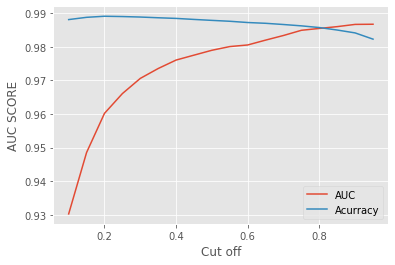

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.ylabel('AUC SCORE')           #plotting auc and roc with different thresholds points
plt.xlabel('Cut off')
plt.plot(np.arange(0.1,0.99,step=.05),ROC,label='AUC')
plt.plot(np.arange(0.1,0.99,step=.05),ACC,label='Acurracy')
plt.legend()
plt.show()

In [0]:
predict3 = np.array(list(predict))
for i in range(len(y_test)):
  if predict[i]>=0.2:            #setting the threshold at 0.2
    predict3[i]=1
  else:
    predict3[i]=0

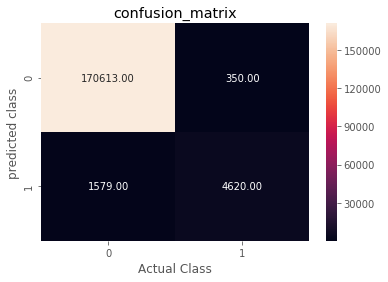

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict3)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [0]:
roc_auc_score(y_test,predict3)    #checking the roc_auc_score

0.8716171352113795

#CONCLUSION
Using LGBM and with some feature engineering we have build a model that can predict the class of transaction as fraudulent or non-fraudulent with the confidence of 87.1%